# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/park.png?raw=true" width=800, align="left"/>

- 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
- 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
- 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

# [미션 3] 구별 주민등록인구 데이터 분석

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [4]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [6]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [8]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### 기본 데이터: 1.3 seoul_people_202407.csv
- 서울시 주민 등록 데이터
- 세대수, 한국인, 외국인, 고령인구수 등에 대한 정보

# 1. 데이터 불러오기

- 분석 대상 데이터를 불러와 데이터프레임으로 선언합니다.

### [참고] 데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)

- csv: pd.read_csv('파일이름.csv')
- txt: pd.read_csv('파일이름.csv', sep='구분자')
- xlsx: pd.read_excel('파일이름.xlsx')
- pickle: pd.read_pickle('파일이름.pkl')

## [실습1] 데이터 불러오기

- 대상 파일: 1.3 seoul_people_202407.csv
- 불러온 데이터는 seoul_people 데이터프레임으로 선언하세요.
- 데이터 불러올 때 참고할 사항 
    - 구분자(sep)는 '\t' 입니다
    - CP949 인코더를 사용해 주세요

In [14]:
# 데이터 불러오기
seoul_people = pd.read_csv(path + '1.3 seoul_people_202407.csv', sep='\t', encoding='CP949')

# 확인
seoul_people.head()

,동별(1),동별(2),2024. 07,2024. 07.1,2024. 07.2,2024. 07.3,2024. 07.4,2024. 07.5,2024. 07.6,2024. 07.7,2024. 07.8,2024. 07.9
0,동별(1),동별(2),세대 (세대),합계 (명),합계 (명),합계 (명),한국인 (명),한국인 (명),한국인 (명),외국인 (명),외국인 (명),외국인 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자
2,합계,소계,4486857,9613267,4631025,4982242,9360400,4521316,4839084,252867,109709,143158
3,합계,종로구,72429,150044,71654,78390,139093,66956,72137,10951,4698,6253
4,합계,중구,65338,131757,63365,68392,121407,58546,62861,10350,4819,5531


In [18]:
# tail() 메서드로 하위 데이터 확인
seoul_people.tail()

,동별(1),동별(2),2024. 07,2024. 07.1,2024. 07.2,2024. 07.3,2024. 07.4,2024. 07.5,2024. 07.6,2024. 07.7,2024. 07.8,2024. 07.9
23,합계,관악구,286403,497137,248571,248566,480627,242010,238617,16510,6561,9949
24,합계,서초구,170606,412147,196114,216033,407616,193937,213679,4531,2177,2354
25,합계,강남구,245344,562755,268993,293762,557151,266448,290703,5604,2545,3059
26,합계,송파구,287418,658360,315700,342660,652292,312916,339376,6068,2784,3284
27,합계,강동구,206631,467902,228197,239705,463550,226299,237251,4352,1898,2454


## [실습2] 제대로 불러오기

- head(), tail() 메서드로 조회 결과를 볼 때, 세 번째 행부터 읽어와야 합니다.
- header=2를 지정하여 다시 불러와 seoul_people 데이터프레임으로 선언하세요.

In [20]:
# 데이터 불러오기(세 번째 행부터)
seoul_people = pd.read_csv(path + '1.3 seoul_people_202407.csv', sep='\t', encoding='CP949', skiprows=2)

# 확인
seoul_people

,동별(1),동별(2),소계,소계.1,남자,여자,소계.2,남자.1,여자.1,소계.3,남자.2,여자.2
0,합계,소계,4486857,9613267,4631025,4982242,9360400,4521316,4839084,252867,109709,143158
1,합계,종로구,72429,150044,71654,78390,139093,66956,72137,10951,4698,6253
2,합계,중구,65338,131757,63365,68392,121407,58546,62861,10350,4819,5531
3,합계,용산구,104057,218823,105480,113343,205603,98357,107246,13220,7123,6097
4,합계,성동구,133102,283334,136779,146555,276194,133758,142436,7140,3021,4119
5,합계,광진구,170439,349682,166541,183141,333946,160153,173793,15736,6388,9348
6,합계,동대문구,173860,359543,173830,185713,341086,166970,174116,18457,6860,11597
7,합계,중랑구,188789,386610,188685,197925,380912,186434,194478,5698,2251,3447
8,합계,성북구,197324,436063,207616,228447,423846,203182,220664,12217,4434,7783
9,합계,강북구,143059,289827,139260,150567,284579,137469,147110,5248,1791,3457


- seoul_people 데이터프레임이 '동별(2)', '남자', '여자', '소계.1' 열만 갖게 하세요.

In [22]:
# '동별(2)','남자','여자','소계.1' 행만 갖게
# df = df[['열1', '열2', '열3']] 형태의 구문 사용
seoul_people=seoul_people[['동별(2)', '남자', '여자', '소계.1']]

# 확인
seoul_people

,동별(2),남자,여자,소계.1
0,소계,4631025,4982242,9613267
1,종로구,71654,78390,150044
2,중구,63365,68392,131757
3,용산구,105480,113343,218823
4,성동구,136779,146555,283334
5,광진구,166541,183141,349682
6,동대문구,173830,185713,359543
7,중랑구,188685,197925,386610
8,성북구,207616,228447,436063
9,강북구,139260,150567,289827


- 소계인 첫 번째 행은 의미가 없으니 제거하고, 인덱스를 초기화하세요.

In [24]:
# 첫 번째 행 제거
# 참고: df.drop(인덱스) 형태 구문 사용 
seoul_people= seoul_people.drop(index=0)

# 확인
seoul_people 

,동별(2),남자,여자,소계.1
1,종로구,71654,78390,150044
2,중구,63365,68392,131757
3,용산구,105480,113343,218823
4,성동구,136779,146555,283334
5,광진구,166541,183141,349682
6,동대문구,173830,185713,359543
7,중랑구,188685,197925,386610
8,성북구,207616,228447,436063
9,강북구,139260,150567,289827
10,도봉구,148622,159162,307784


In [26]:
# 인덱스 초기화
# 참고: reset_index() 메서드 사용
seoul_people.reset_index(drop=True, inplace=True)
# 확인


- 다음과 같이 seoul_people 데이터프레임의 열 이름을 변경하세요.
    - '동별(2)' --> '자치구', '소계.1' --> '합계'

In [28]:
# 열 이름 변경: '동별(2)' --> '자치구', '소계.1' --> '합계'
# 참고: rename() 메서드 사용
seoul_people = seoul_people.rename(columns={'동별(2)': '자치구', '소계.1': '합계'})

# 확인
seoul_people

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682
5,동대문구,173830,185713,359543
6,중랑구,188685,197925,386610
7,성북구,207616,228447,436063
8,강북구,139260,150567,289827
9,도봉구,148622,159162,307784


# 2. 기본 정보 확인 및 전처리

- 분석 대상 테이터를 탐색하고 적절한 전처리를 수행합니다.

## [실습3] 기본 정보 확인

- seoul_people 데이터프레임 정보를 확인하세요.
- head(), tail(), info(), describe() 메서드 등을 활용해 보세요.

In [30]:
# tail() 메서드로 하위 데이터 확인
seoul_people.tail()

,자치구,남자,여자,합계
20,관악구,248571,248566,497137
21,서초구,196114,216033,412147
22,강남구,268993,293762,562755
23,송파구,315700,342660,658360
24,강동구,228197,239705,467902


In [32]:
# info() 메서드로 열 이름, 데이터 개수, 데이터 형식 등 확인
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   남자      25 non-null     int64 
 2   여자      25 non-null     int64 
 3   합계      25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 932.0+ bytes


In [34]:
# describe() 메서드로 기술통계정보 확인
seoul_people.describe()

,남자,여자,합계
count,25.000000,25.000000,25.000000
mean,185241.000000,199289.680000,384530.680000
std,60928.455965,65843.322476,126587.549792
min,63365.000000,68392.000000,131757.000000
25%,148622.000000,159162.000000,307784.000000
50%,188685.000000,201865.000000,389003.000000
75%,221603.000000,239705.000000,467902.000000
max,315700.000000,342660.000000,658360.000000


- seoul_people 데이터프레임을 df_seoul_people.csv 파일로 저장하세요.

In [37]:
# csv 파일로 저장 (파일명: df_seoul_people.csv)
# 참고: to_csv() 메서드를 사용, index=False 지정 
seoul_people.to_csv(path + 'df_seoul_people.csv', index=False)

# 3. 데이터 분석

- 다양한 분석 과정을 통해 인사이트를 도출하세요.

## [실습4] 시각화 분석

- 다양한 열를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

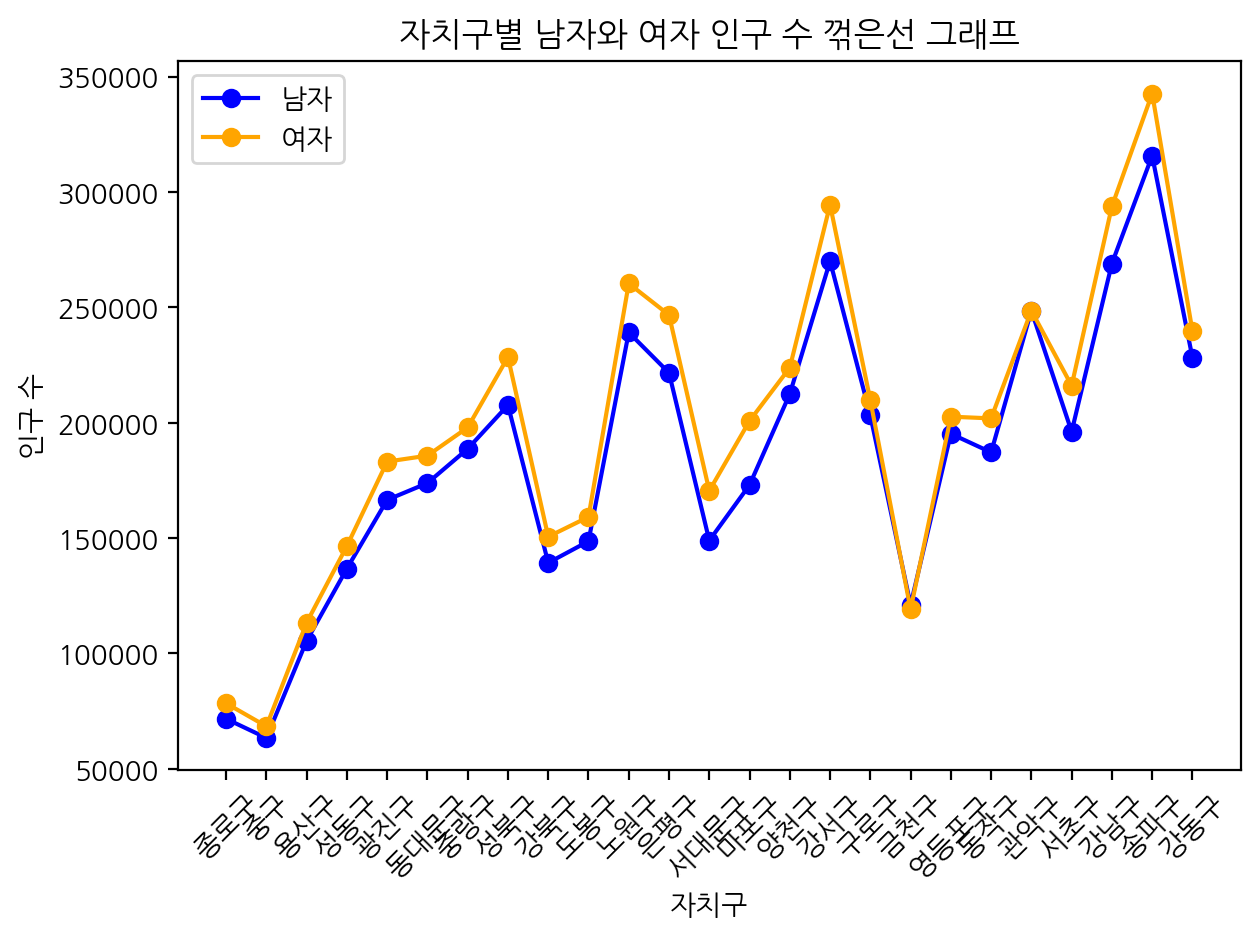

In [45]:
# 주석
# plt.figure(figsize=(12, 6))

# 남자와 여자의 인구 수 꺾은선 그래프
plt.plot(seoul_people['자치구'], seoul_people['남자'], marker='o', label='남자', color='blue')
plt.plot(seoul_people['자치구'], seoul_people['여자'], marker='o', label='여자', color='orange')

# 그래프 제목 및 레이블 설정
plt.title('자치구별 남자와 여자 인구 수 꺾은선 그래프')
plt.xlabel('자치구')
plt.ylabel('인구 수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

# 자치구별로 거의 남여 비율이 거의 비슷한 걸로 보임
# 송파구에 사람이 많고 종로구에 사람이 제일 적다 

<Figure size 1000x600 with 0 Axes>

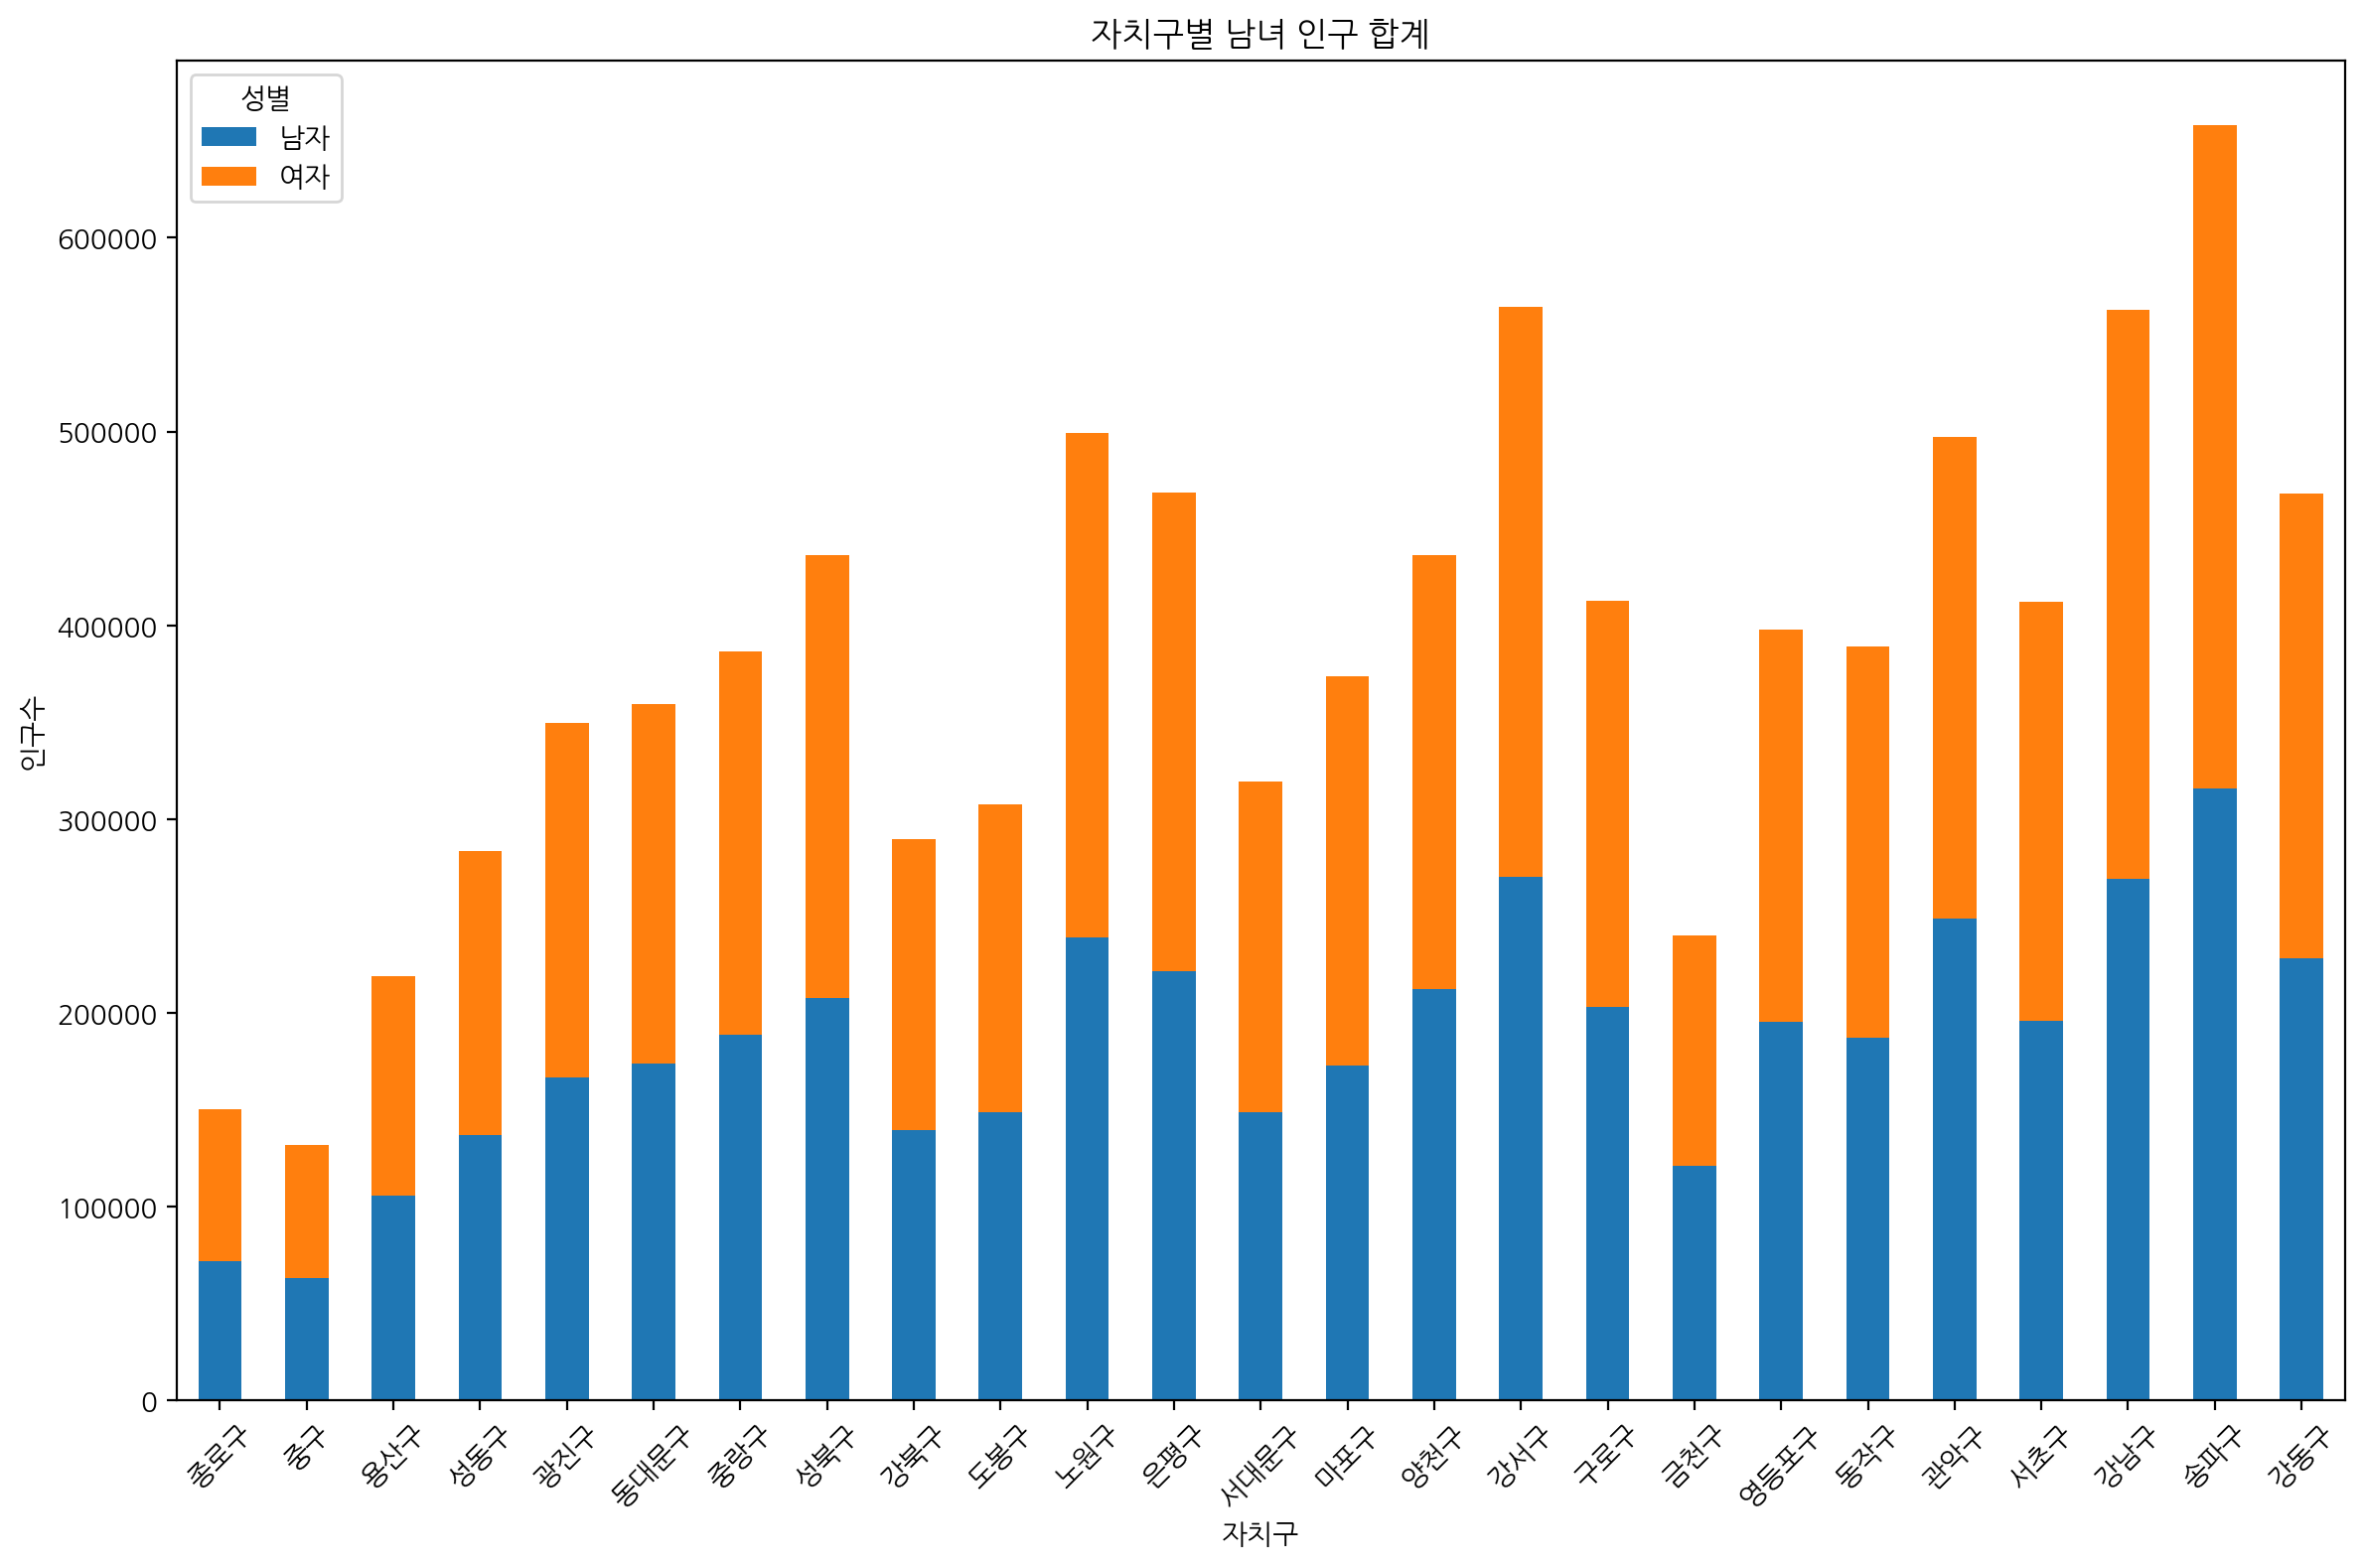

In [47]:
# 주석

plt.figure(figsize=(10, 6))
seoul_people.plot(x='자치구', y=['남자', '여자'], kind='bar', figsize=(12, 8), stacked=True)
plt.title('자치구별 남녀 인구 합계')
plt.xlabel('자치구')
plt.ylabel('인구수')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.tight_layout()
plt.show()

In [ ]:
# 주석




In [ ]:
# 위 차트를 통해 알게된 사실을 정리해 보세요.


